In [1]:
import numpy as np
import global_variables as gv
import derivative_gundlach as der
import geometry
import energy_momentum as tmunu
import variable_change as variables
import utilities
import rhs
import initial_data
from scipy.integrate import ode
import pylab as pl
import evolve

%matplotlib inline

Version 7.000


In [2]:
r,rho0,p0,ur0,a0,b0,K0,alpha0 = initial_data.gaussian_packet()

In [3]:
dr = r[1] - r[0]
print dr

0.0264150943396


In [4]:
print gv.TIME,gv.RESTIME

0.6 70


In [5]:
Sr0,tau0 = variables.to_conserved(r,rho0,p0,ur0,a0,b0,alpha0)

In [5]:
t_array,soln_array,primitive_array = evolve.evolve(0,gv.TIME,gv.RESTIME,
                                                   r,rho0,p0,ur0,a0,b0,K0,alpha0)

	 t = 0.0
	 t = 1.667579296e-09
	 t = 3.335158592e-08
	 t = 5.002737888e-08
	 t = 1.3340634368e-07
	 t = 1.48229270756e-07
	 t = 1.667579296e-07
	 t = 1.667579296e-07
	 t = 5.002737888e-07
	 t = 6.670317184e-07
	 t = 1.5008213664e-06
	 t = 1.64905063716e-06
	 t = 1.8343372256e-06
	 t = 1.8343372256e-06
	 t = 5.1694958176e-06
	 t = 6.8370751136e-06
	 t = 1.51749715936e-05
	 t = 1.66572643012e-05
	 t = 1.85101301856e-05
	 t = 1.85101301856e-05
	 t = 5.18617161056e-05
	 t = 6.85375090656e-05
	 t = 0.000151916473866
	 t = 0.000166739400941
	 t = 0.000185268059786
	 t = 0.000185268059786
	 t = 0.000518783918985
	 t = 0.000685541848585
	 t = 0.00151933149659
	 t = 0.00166756076734
	 t = 0.00185284735579
	 t = 0.00185284735579
	 t = 0.00322140831941
	 t = 0.00390568880122
	 t = 0.00732709121029
	 t = 0.00793534052745
	 t = 0.00869565217391
	 t = 0.00869565217391
integrated to 0.00869565217391 out of 0.6.
	 t = 0.00869565217391
	 t = 0.0104347826087
	 t = 0.0113043478261
	 t = 0.015652173913
	

energy_momentum.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  out = ((rho + p)*get_w(ur,a)*ur)/alpha
variable_change.py:33: RuntimeWarning: invalid value encountered in double_scalars
  Sr_tilde=sqrt_det*alpha*tmunu.get_T_tu_rd(rho,p,ur,alpha,a)
energy_momentum.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  out = ((rho + p)*W*W - p)/(alpha*alpha)
variable_change.py:34: RuntimeWarning: invalid value encountered in double_scalars
  tau_tilde= ((alpha**2)*sqrt_det*tmunu.get_T_tu_tu(rho,p,ur,alpha,a)


In [10]:
rhos = primitive_array[...,0,...]
ps = primitive_array[...,1,...]
urs = primitive_array[...,2,...]

In [19]:
U0_f = utilities.flatten(soln_array[0])
rhs0_f = rhs.rhs(0,r,U0)
rhs0 = utilities.unflatten(rhs0_f,gv.NUM_EVOLVED_VARIABLES)

	 t = 0


In [6]:
Krr0,Ktt0=0,0
Paether0=0
F0 = rhs.flux(r,rho0,p0,ur0,Sr0,tau0,a0,b0,K0,alpha0,False)
S0 = rhs.source(r,rho0,p0,ur0,Sr0,tau0,a0,b0,alpha0,Krr0,Ktt0,Paether0)

In [7]:
dF0 = np.empty_like(F0)
for i,f in enumerate(F0):
    dF0[i] = der.div(f,r,rhs.FLUX_SYMMETRIES[i])

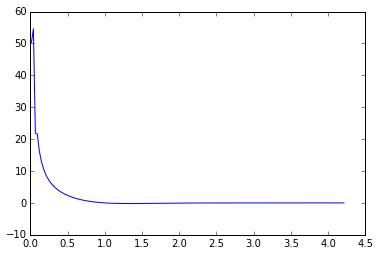

In [8]:
pl.plot(r,dF0[0])

In [9]:
print rhs.FLUX_SYMMETRIES

[True, False, False, False, False]


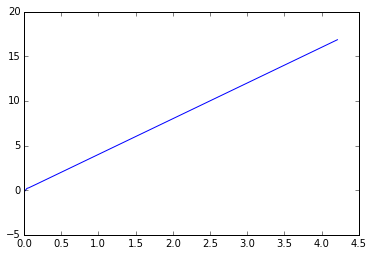

In [22]:
pl.plot(r,der.div(r**2,r,der.EVEN))

In [23]:
der.div(r**2,r,der.EVEN)[0]

-0.081838177940596557